In [3]:
import pandas as pd
import numpy as np
import datetime

In [4]:
#leitura do csv
bike_data_frame = pd.read_csv('./data/bike-sharing.csv')
bike_data_frame.head()

,datetime,rec_id,season,year,month,hour,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,2011-01-01,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
# a. Qual o tamanho desse dataset?
bike_data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   datetime           17379 non-null  object 
 1   rec_id             17379 non-null  int64  
 2   season             17379 non-null  int64  
 3   year               17379 non-null  int64  
 4   month              17379 non-null  int64  
 5   hour               17379 non-null  int64  
 6   is_holiday         17379 non-null  int64  
 7   weekday            17379 non-null  int64  
 8   is_workingday      17379 non-null  int64  
 9   weather_condition  17379 non-null  int64  
 10  temp               17379 non-null  float64
 11  atemp              17379 non-null  float64
 12  humidity           17379 non-null  float64
 13  windspeed          17379 non-null  float64
 14  casual             17379 non-null  int64  
 15  registered         17379 non-null  int64  
 16  total_count        173

In [6]:
# b. Qual a média da coluna windspeed?
#bike_data_frame.describe()
print('Media de windspeed {}'.format(bike_data_frame.windspeed.mean()))

Media de windspeed 0.1900976063064618


In [7]:
bike_data_frame.windspeed.describe()

count    17379.000000
mean         0.190098
std          0.122340
min          0.000000
25%          0.104500
50%          0.194000
75%          0.253700
max          0.850700
Name: windspeed, dtype: float64

In [8]:
# c. Qual a média da coluna temp?
print('Media de windspeed {}'.format(bike_data_frame.temp.mean()))

Media de windspeed 0.4969871684216583


In [9]:
# d. Quantos registros existem para o ano de 2011?
# e. Quantos registros existem para o ano de 2012?
# 1) transformar a coluna que é um object para datetime
bike_data_frame['datetime'] = pd.to_datetime(bike_data_frame['datetime'])
# 2) separando datetime em dia, mes e ano
bike_data_frame['datetime_month'] = bike_data_frame['datetime'].apply(lambda x: x.month)
bike_data_frame['datetime_year'] = bike_data_frame['datetime'].apply(lambda x: x.year)
# 3) print o resultado
# n_2011 = bike_data_frame.query('datetime_year==2011').datetime_year.count()
# n_2012 = bike_data_frame.query('datetime_year==2012').datetime_year.count()
bike_data_frame.query('datetime_year==2011 or datetime_year==2012').datetime_year.value_counts()

2012    8734
2011    8645
Name: datetime_year, dtype: int64

In [10]:
# f. Quantas locações de bicicletas foram efetuadas em 2011? Qual é a coluna que corresponde a quantidade de locacoes de bikes?
sum(bike_data_frame.query('datetime_year==2011').total_count)

1243103

In [11]:
# g. Quantas locações de bicicletas foram efetuadas em 2012?
sum(bike_data_frame.query('datetime_year==2012').total_count)

2049576

In [12]:
# definindo funcao para as questoes de h ate m
def media_maior_menor_por_atributo(dataframe, atributo):
    atributos = []
    medias = []
    lista = dataframe[atributo].unique()
    for i in lista:
        indice = str(i)
        n_loc_total_count = sum(dataframe.query(atributo+'=='+indice).total_count)
        n_loc_frequencia = dataframe.query(atributo+'=='+indice)[atributo].count()
        atributos.append(atributo+'_'+indice)
        medias.append((n_loc_total_count/n_loc_frequencia))
        d = {atributo:atributos, 'medias':medias}
    return pd.DataFrame(data=d)

In [13]:
# h. Qual estação do ano contém a maior média de locações de bicicletas?
# i. Qual estação do ano contém a menor média de locações de bicicletas?
bike_data_frame.season.unique()

array([1, 2, 3, 4])

In [14]:
# não sei responder se a quantidade de locacoes é pela coluna total_count ou é por cada linha de registro assim vou fazer os dois calculos
n_loc_total_count_season_1 = sum(bike_data_frame.query('season==1').total_count)
n_loc_frequencia_season_1 = bike_data_frame.query('season==1').season.count()
print('season_1 >> media por total_count: {}'.format(n_loc_total_count_season_1 / n_loc_frequencia_season_1))
n_loc_total_count_season_2 = sum(bike_data_frame.query('season==2').total_count)
n_loc_frequencia_season_2 = bike_data_frame.query('season==2').season.count()
print('season_2 >> media por total_count: {}'.format(n_loc_total_count_season_2 / n_loc_frequencia_season_2))
n_loc_total_count_season_3 = sum(bike_data_frame.query('season==3').total_count)
n_loc_frequencia_season_3 = bike_data_frame.query('season==3').season.count()
print('season_3 >> media por total_count: {}'.format(n_loc_total_count_season_3 / n_loc_frequencia_season_3))
n_loc_total_count_season_4 = sum(bike_data_frame.query('season==4').total_count)
n_loc_frequencia_season_4 = bike_data_frame.query('season==4').season.count()
print('season_4 >> media por total_count: {}'.format(n_loc_total_count_season_4 / n_loc_frequencia_season_4))


season_1 >> media por total_count: 111.11456859971712
season_2 >> media por total_count: 208.34406894987526
season_3 >> media por total_count: 236.01623665480426
season_4 >> media por total_count: 198.86885633270322


In [15]:
# h. Qual estação do ano contém a maior média de locações de bicicletas?
atributo = 'season'
df_season = media_maior_menor_por_atributo(bike_data_frame, atributo)
df_season.loc[df_season['medias']==df_season.medias.max()]

,season,medias
2,season_3,236.016237


In [16]:
# i. Qual estação do ano contém a menor média de locações de bicicletas?
df_season.loc[df_season['medias']==df_season.medias.min()]

,season,medias
0,season_1,111.114569


<AxesSubplot:>

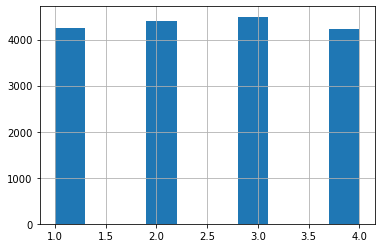

In [17]:
bike_data_frame.season.hist()

In [18]:
# j. Qual horário do dia contém a maior média de locações de bicicletas?
# k. Qual horário do dia contém a menor média de locações de bicicletas?
df_hour = media_maior_menor_por_atributo(bike_data_frame, 'hour')
print(df_hour.loc[df_hour['medias']==df_hour.medias.max()])
print(df_hour.loc[df_hour['medias']==df_hour.medias.min()])

       hour      medias
17  hour_17  461.452055
     hour    medias
4  hour_4  6.352941


In [19]:
# l. Que dia da semana contém a maior média de locações de bicicletas?
# m. Que dia da semana contém a menor média de locações de bicicletas?
df_day = media_maior_menor_por_atributo(bike_data_frame, 'weekday')
print(df_day.loc[df_day['medias']==df_day.medias.max()])
print(df_day.loc[df_day['medias']==df_day.medias.min()])

     weekday      medias
5  weekday_4  196.436665
     weekday      medias
1  weekday_0  177.468825


In [20]:
# n. Às quartas-feiras ( weekday = 3 ), qual o horário do dia contém a maior média de locações de bicicletas?
df_weekday_3 = bike_data_frame.query('weekday==3')
df_3 = media_maior_menor_por_atributo(df_weekday_3, 'hour')
#df_3.sort_values(by='medias')
df_3.loc[df_3['medias']==df_3.medias.max()]

,hour,medias
16,hour_17,513.144231


In [21]:
# o. Aos sábados ( weekday = 6 ), qual o horário do dia contém a maior média de locações de bicicletas?
df_weekday_6 = bike_data_frame.query('weekday==6')
df_6 = media_maior_menor_por_atributo(df_weekday_6, 'hour')
# df_6.sort_values(by='medias')
df_6.loc[df_6['medias']==df_6.medias.max()]

,hour,medias
13,hour_13,385.371429
